In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt 

%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist.load_data()

(X_train, y_train), (X_test, y_test) = mnist

X_train = X_train/255.
X_test = X_test/255.

11493376/11490434 [==============================] - 0s 0us/step


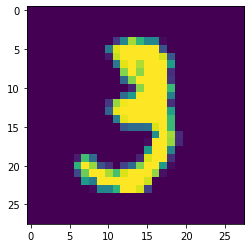

In [3]:
m = X_train.shape[0]
plt.imshow(X_train[10])

In [4]:
X_train = X_train.reshape(m, 28, 28, 1)  ## 28x28x1 resolution grayscale images
X_test = X_test.reshape(10000, 28, 28, 1)

print(f"X_train shape: {X_train.shape} \nX_test shape: {X_test.shape}")

X_train shape: (60000, 28, 28, 1) 
X_test shape: (10000, 28, 28, 1)


In [5]:
y_train.shape

(60000,)

In [44]:
model = None
model = keras.Sequential(
    [
      tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),
                             padding="same", kernel_initializer="glorot_uniform"),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1),
                                   padding="valid"), 
      tf.keras.layers.Activation(tf.nn.relu),
      tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=2,
                            padding="same", kernel_initializer="glorot_uniform"),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1),
                                   padding="valid"), 
      tf.keras.layers.Activation(tf.nn.relu),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(10, kernel_initializer="glorot_uniform",
                            activation="softmax")
      
    ]
)

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [45]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),
                    verbose=2)

Epoch 1/10
1875/1875 - 6s - loss: 0.1211 - accuracy: 0.9625 - val_loss: 0.0511 - val_accuracy: 0.9817
Epoch 2/10
1875/1875 - 6s - loss: 0.0496 - accuracy: 0.9845 - val_loss: 0.0335 - val_accuracy: 0.9890
Epoch 3/10
1875/1875 - 6s - loss: 0.0380 - accuracy: 0.9880 - val_loss: 0.0358 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 - 6s - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0288 - val_accuracy: 0.9908
Epoch 5/10
1875/1875 - 6s - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0256 - val_accuracy: 0.9905
Epoch 6/10
1875/1875 - 5s - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0263 - val_accuracy: 0.9913
Epoch 7/10
1875/1875 - 6s - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0246 - val_accuracy: 0.9923
Epoch 8/10
1875/1875 - 5s - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.0310 - val_accuracy: 0.9915
Epoch 9/10
1875/1875 - 5s - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0311 - val_accuracy: 0.9915
Epoch 10/10
1875/1875 - 5s - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0301 - 

In [47]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           multiple                  320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling multiple                  0         
_________________________________________________________________
activation_14 (Activation)   multiple                  0         
_________________________________________________________________
conv2d_15 (Conv2D)           multiple                  51264     
_________________________________________________________________
max_pooling2d_15 (MaxPooling multiple                  0         
_________________________________________________________________
activation_15 (Activation)   multiple                  0         
_________________________________________________________________
flatten_7 (Flatten)          multiple                 

In [48]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


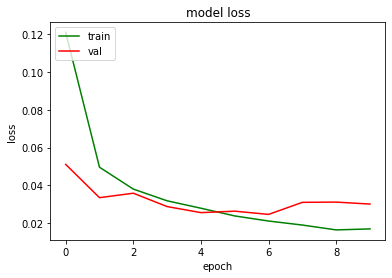

In [49]:
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="red")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()